In [1]:
#---------------------AGENDA------------------------------------
# draw-back of train-test...
# k-fold CV(improvements)-----(tunning para,choosing btw models and feature selection)

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Steps for K-fold CV
# 1)split dataset into K equal partition('folds')
# 2)use fold 1 as testing and union of the other folds as training
# 3)cal testinng accuracy
# 4)repeat 2 & 3 for K times,using differ fold as testing each time
# 5)use the avg testing acc as the estimate of out-of-sample acc

In [24]:
# kf = KFold(25, n_splits=5, shuffle=False)
# print('{} {:^61} {}'.format('Iteration','Train_set','Test_set'))
# for it,data in enumerate(kf,start=1):
#     print('{:^9} {} {:^25}'.format(it,data[0],data[1]))

# ----------------k=10(recommended)-------------------
#-----------------startified sampling-------------
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[2,5],[4,5]])
y = np.array([1, 2, 3, 4,5,6])
kf = KFold(n_splits=3)
kf.get_n_splits(X)

print(kf)
KFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [2 3 4 5] TEST: [0 1]
TRAIN: [0 1 4 5] TEST: [2 3]
TRAIN: [0 1 2 3] TEST: [4 5]


In [4]:
iris = load_iris()
X = iris.data
y = iris.target

# 150 samples into 10 folds means 15 in each then 1st fold as x_test and it's equvivalent 15 response as a y_test and other 
# folds union as x_train and it's equvivalent response as y_train ......and then 2nd fold and so on..

In [2]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(score)
print(score.mean())

NameError: name 'KNeighborsClassifier' is not defined

In [37]:
acc_mean_score=[]
k_values=range(1,31)
for k_value in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_value)
    score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    acc_mean_score.append(score.mean())
print(acc_mean_score)    

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'CV_accuracy')

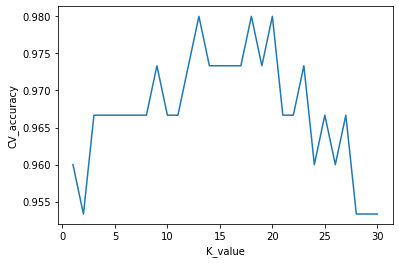

In [43]:
%matplotlib inline
plt.plot(k_values,acc_mean_score)
plt.xlabel('K_value')
plt.ylabel('CV_accuracy')

#bias-variance trade off--------
#low k value----low bias & high var
#high k     ----high bias & low var 
#here we select k=20 as tunning parameter......high val of k generate lower complex model

In [5]:
#logistic reg
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.9733333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
#here scorinng is loss function so try to min the cross_val_score it's values are (-).....
from sklearn.linear_model import LinearRegression
df = pd.read_csv("C:\\Users\\UMANG PATEL\\Desktop\\Scikit_learn\\Advertising.csv",index_col=0)
feature_cols = ['TV','Radio']
X = df[feature_cols]
y = df['Sales']

linreg = LinearRegression()

score = (-cross_val_score(linreg,X,y,cv=10,scoring='neg_root_mean_squared_error'))

print(score.mean())

1.6796748419090766


In [57]:
# print(sorted(sklearn.metrics.SCORERS.keys()))

In [58]:
#advantages
# repeat cv multiple times
# reliable by reducing variance associated with single trial of cv
# creating hold-out set
# feature engineering & selection

#cons:
#computation is expensive when dataset is very large